# TD 6 : Le perceptron
---

Dans ce dernier TD, nous allons explorer le fonctionnement du perceptron, le véritable précurseur des algorithmes les plus puissants dans l'*apprentissage machine* d'aujourd'hui, tel l'apprentissage profond. 

À la base, il s'agit d'un classificateur binaire qui permet d'apprendre des associations *entrée*--*sortie* arbitraires tant que les entrées appartenant à des catégories différentes sont linéairement séparables. (Ce qui devient moins limitant si l'espace des entrées devient très haut-dimensionnelle.) 

L'équation du perceptron est la suivante :

$\hat y = {\rm sign}(\sum_j w_i x_i + b).$

Ici, $\hat y$ est la classification produite par le perceptron (la *sortie*), les paramètres $w_i$ projetent l'*entrée* $x$ (avec les composantes $x_i$) sur l'axe réelle et correspondent en quelque sorte à des poids synaptiques ; $b$ correspond enfin un paramètre de seuil.  


In [1]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Allons créer des entrées avec des catégories distinctes préscrites. Le but sera d'apprendre les poids synaptiques (et la valeur de $b$) qui permettront de faire une classification correcte pour des entrées futures. 

Text(0, 0.5, '$x_2$')

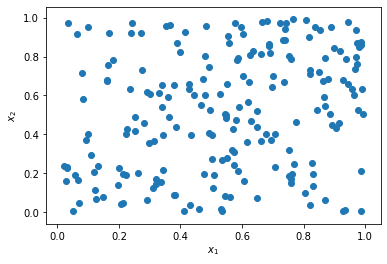

In [8]:

# nombre de points 
n = 200

# choisir des points aléatoires dans [0,1)x[0,1)
ps = np.random.uniform(size=(n,2))


fig, ax = plt.subplots()
ax.scatter(*ps.T)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')



Text(0, 0.5, '$x_2$')

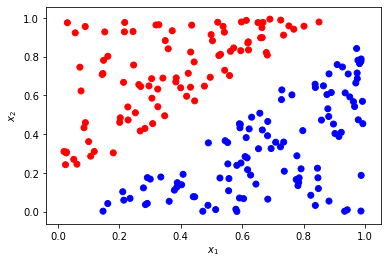

In [9]:
# Distinguer deux catégories de points
# (en 2D) rélatif par rapport à une droite
# séparant l'espace

def category(p, a=0.0, b=1.):
    """Return +1 (-1) for points
    above (below) straight line 
    defined by y = a + b*x"""
    px, py = p
    y = a + b*px
    return 2*(py>y) - 1 


#  sortie souhaitée pour les points
cats = np.array([category(p, a=0, b=1) for p in ps])

# nous pouvons faciliter l'apprentissage en
# imposant une séparation de taille finie entre
# les points des deux catégories
sep = 0.1

ps[cats==1] *= 1-sep
ps[cats==1,1] += sep

ps[cats==-1] *= 1-sep
ps[cats==-1,0] += sep

# nous colorions les points en fonction de leur 
# catégorie en bleu ou rouge
# +1 --> index 1 --> rouge
# -1 --> index 0 --> bleu
colors = np.array(['b','r'])[(cats+1)//2]

fig, ax = plt.subplots()
ax.scatter(*ps.T, c=colors)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

Reste l'implémentation de la règle d'apprentissage ! Nous allons commencer avec un seuil et des poids synaptiques aléatoires, puis mettre à jour le paramètres avec chaque nouveau point que nous considérons.

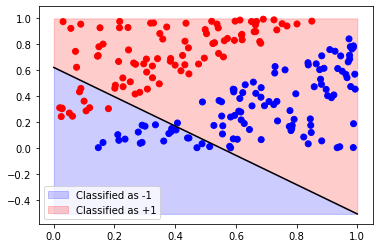

In [13]:
# initialisation des paramètres
w = np.random.uniform(-1,1,2)
b = np.random.uniform(-1,1)

# A chaque étape, nous pouvons plotter 
# comment le perceptron sépare l'espace 
# en deux catégories
x = np.array([0,1])

fig, ax = plt.subplots()
y = -(b+w[0]*x)/w[1]
ax.plot(x, y, 'k')
ax.fill_between(x, y, [max(1,*y),min(0,*y)][int(w[1]>0)], 
                color='b', alpha=0.2, label='Classified as -1')
ax.fill_between(x, y, [max(1,*y),min(0,*y)][int(w[1]<0)], 
                color='r', alpha=0.2, label='Classified as +1')
ax.legend()

# --> plotter les points déjà utilisés selon 
# (par ex. pour les 5 premiers points)
i = n
ax.scatter(ps[:i,0], ps[:i,1], c=colors[:i])

In [14]:
# vérification du coloriage de notre 
# plot de la catégorisation du perceptron
# --> comparer avec ce que le code couleur
#     suggère
ptest = np.array([0,0])
np.sign(sum(w*ptest)+b)

-1.0

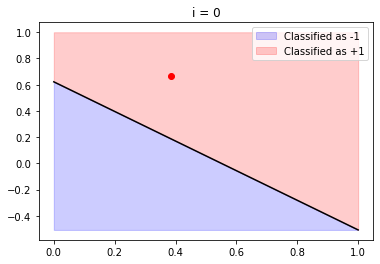

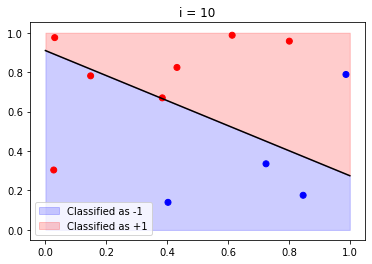

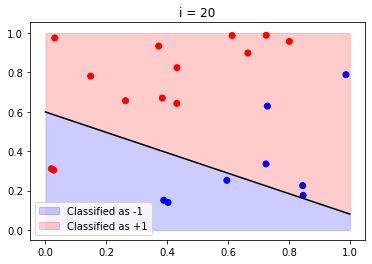

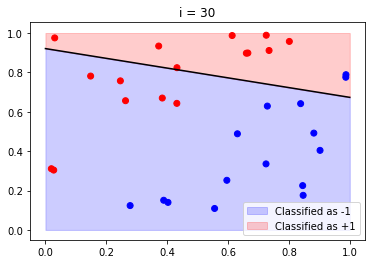

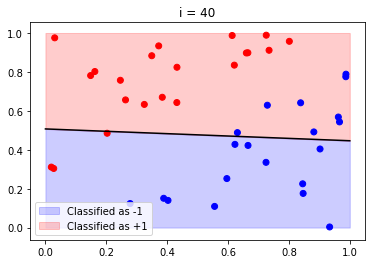

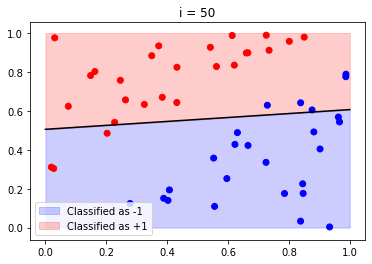

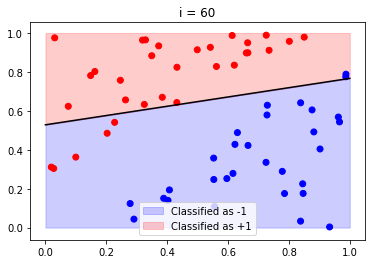

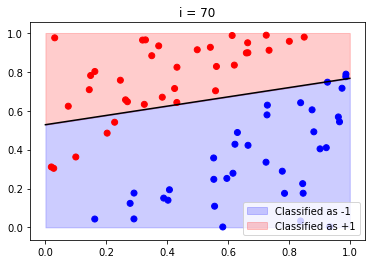

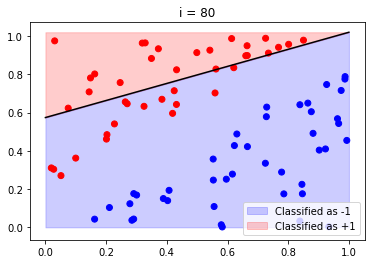

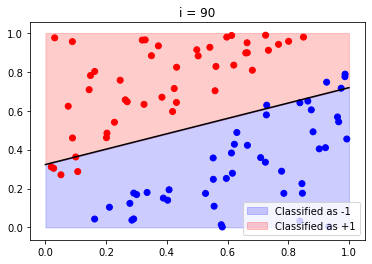

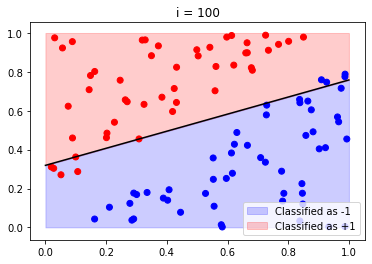

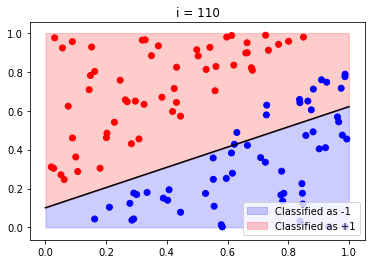

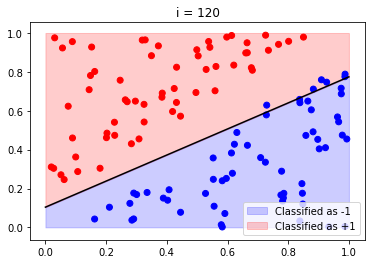

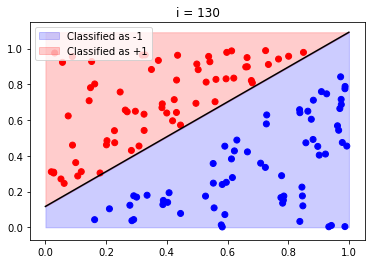

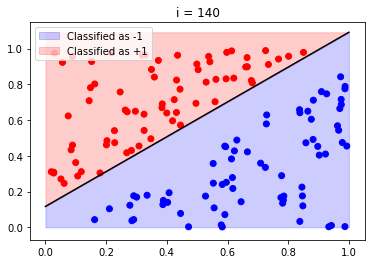

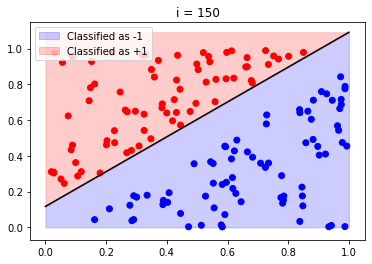

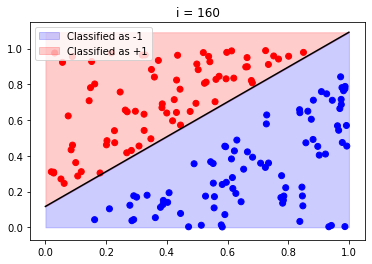

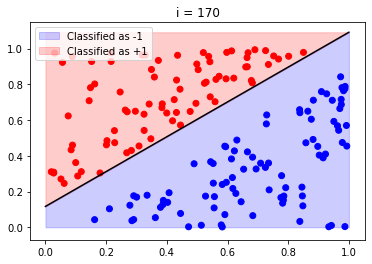

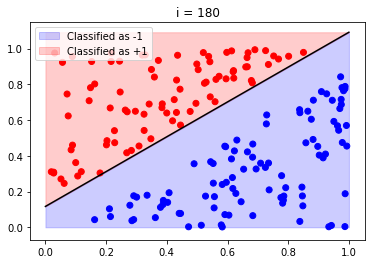

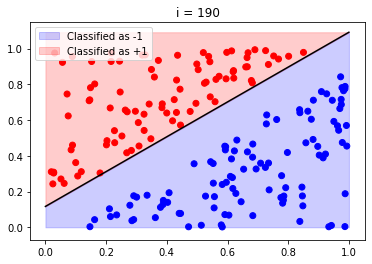

In [15]:
# implémentation de l'algorithme d'apprentissage
# du perceptron 

# taux d'apprentissage
eta = 0.1

for i, p in enumerate(ps):
    # 1) classifier le point p = (x_1, x_2)
    # y_class = sign(sum_j w_j*x_j + b)

    y = np.sign(np.sum(w*p) + b)   

    # 2) comparaison avec la vraie catégorie
    #    y_class == cats[i] ?


    if not y==cats[i]:
        # 3a) mis à jours des poids et du seuil si la 
        #     comparaison est fausse
        #     w = ... 
        #     b = ... 
        #  ---> afficher le nouvel hyperplan avec tous les 
        #       points déjà traités
        #y, eta, cats[i], 
        w = w + eta*cats[i]*p
        b = b + eta*cats[i]

    else:
        # 3b) si la comparaison est juste, passez au 
        #     prochain point (la prochaine donnée)
        pass
    
    # pour un sous-ensemble des temps (ici, tous les 10
    # itérations), afficher la classification actuelle
    # du perceptron et tous les points déjà considérés
    if i%10==0:
        fig, ax = plt.subplots()
        ax.set_title('i = %d'%i)
        y = -(b+w[0]*x)/w[1]
        ax.plot(x, y, 'k')
        ax.fill_between(x, y, [max(1,*y),min(0,*y)][int(w[1]>0)], 
                        color='b', alpha=0.2, label='Classified as -1')
        ax.fill_between(x, y, [max(1,*y),min(0,*y)][int(w[1]<0)], 
                        color='r', alpha=0.2, label='Classified as +1')
        ax.scatter(ps[:i+1,0], ps[:i+1,1], c=colors[:i+1])
        ax.legend()